When we need to build a __Dataloader__ from scratch, we use two methods:   
1、__def __ iter __ (self)__  
2、__def __ next __ (self)__  
By building two methods in __Class__, we can achieve data loading in batches！Let's first give a simple example to illustrate the use of these two methods. From this example, you will quickly understand the functions of these two methods.

In [19]:
class Counter:
    def __init__(self, data):
        self.data = data
        self.start = 0
        self.end = len(data)
        
    def __iter__(self):
        return self
    
    def __next__(self):
        start = self.start
        #  the stop conditions
        if start > self.end:
            raise StopIteration
        self.start += 1
        return self.data[start:self.end]
       

In [18]:
a = [1, 2, 3, 4, 5]
counter = Counter(a)
for i in counter:
    print(i)

[1, 2, 3, 4, 5]
[2, 3, 4, 5]
[3, 4, 5]
[4, 5]
[5]
[]


In the above example, we defined a simple list slicing class that cuts out a part of the list each time it loops.

In the above example, the defined __ iter__(self) indicates that the Counter __Class__ has the iteration function, and __ next__ (self) enables the class to successfully participate in the loop according to each loop (such as a for loop). It should be noted that in order to avoid infinite loops, we must add stop conditions to the __ next__(self) method. When the stop conditions are met, the loop will stop.

Another point may be that beginners (here refers to people with a little python foundation) may not understand the two forms of __start = self.start and self.start = start__. First explain the second type, __self.start = strat__. In fact, you can simply understand that it is the assignment of parameters to the class when we define the class, as shown in the following example:


In [20]:
class Test:
    def __init__(self, data):
        self.data = data
    def add(self):
        return self.data + 1

In [22]:
test = Test(2)
add_result = test.add()
add_result

3

Next we introduce start = self.start. We use this assignment method in the __ next __ (self) method. Here, we set the initial value of start to 0. The value of start will only change every time a loop is completed, otherwise it will always be 0, as shown below:

In [31]:
class Varible:
    def __init__(self, max_len=10):
        self.start =0
        self.max_len = max_len
    def __iter__(self):
        return self
    def __next__(self):
        start = self.start
        if self.start >= self.max_len:
            raise StopIteration
        self.start += 1
        return start, self.start

In [38]:
varible = Varible()
x, y = next(varible) # call once
print(x), print(y)

0
1


(None, None)

Ok, now we will formally create the data set loader. We know that when training a neural network, we usually split the data set (here refers to the training set) into small batches and send them to the neural network in batches.

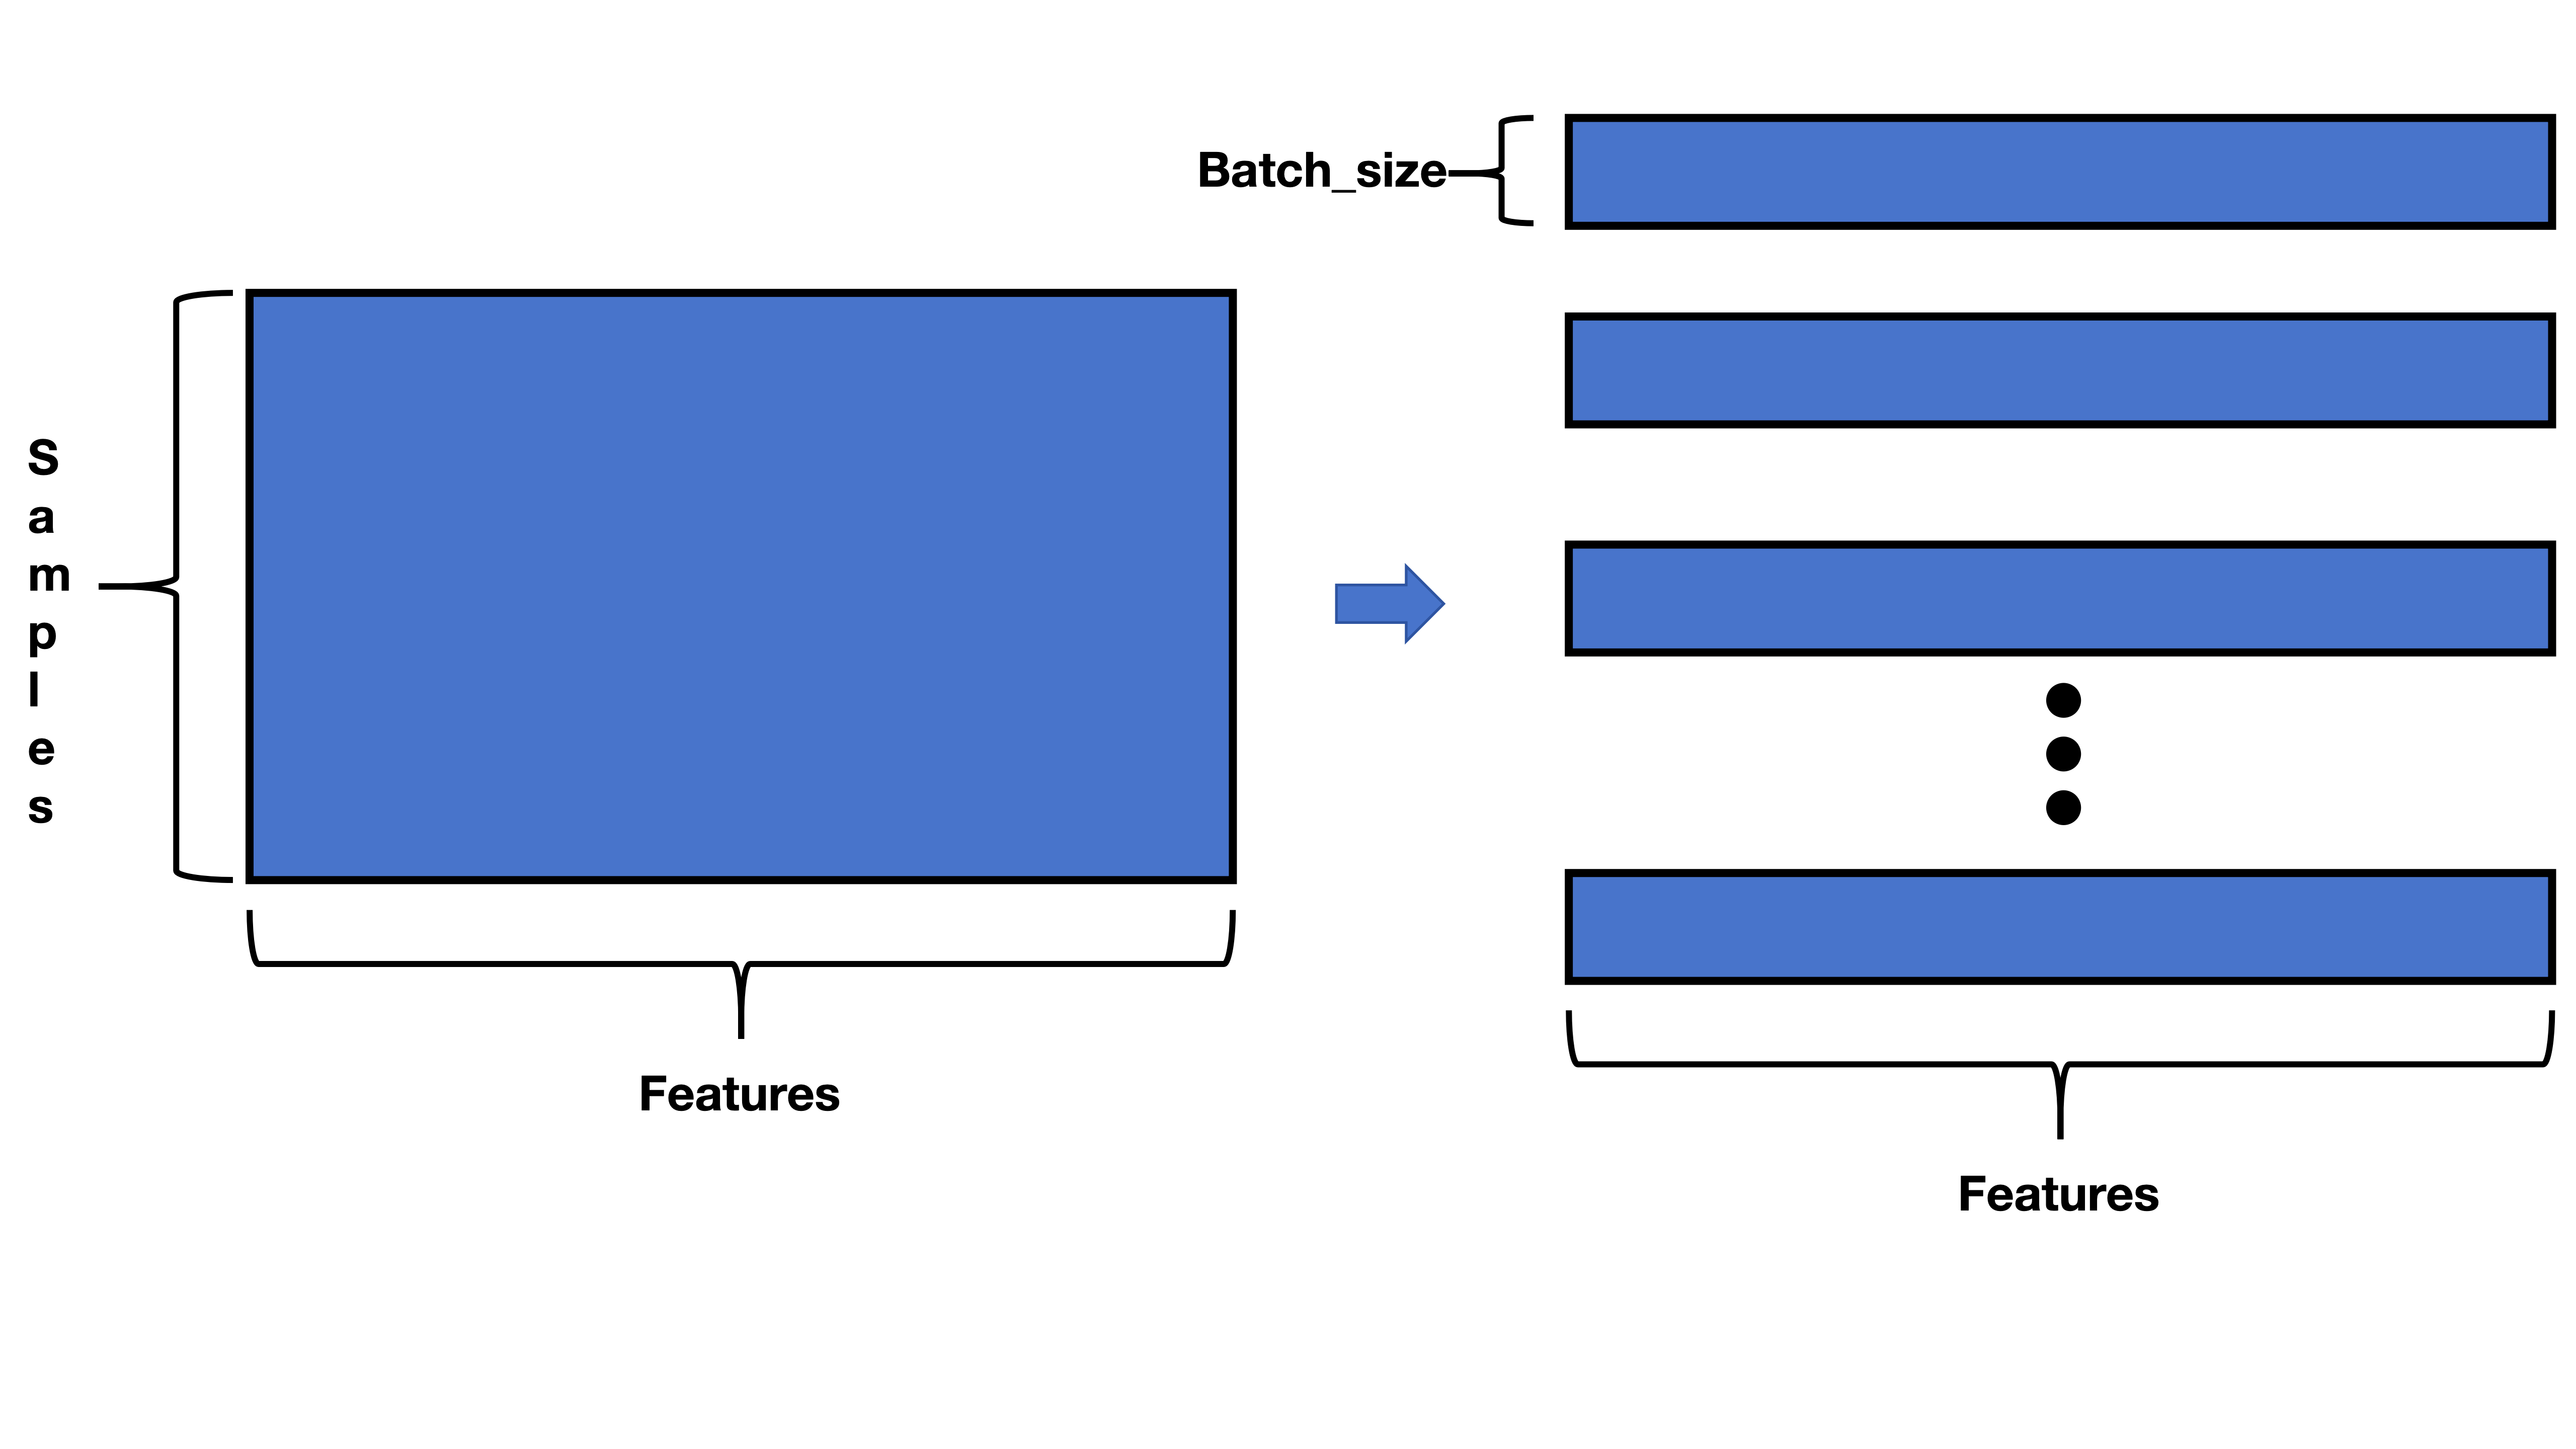

Ok, with the above knowledge background, now we officially build my data loader.

In [43]:
# Randomly generate training data and labels corresponding to the training data
import torch
from random import shuffle
# train_data
X = torch.randn((100, 5))
# labels
Y = torch.randn((100, 1)).reshape(-1, 1)

In [44]:
X.shape, Y.shape

(torch.Size([100, 5]), torch.Size([100, 1]))

In [63]:
class DataLoader:
    def __init__(self, data, labels, batch_size, shuffle=False):
        self.data = data
        self.batch_size = batch_size
        self.labels = labels
        self.indexes = list(range(len(self.data)))
        self.shuffle = shuffle
    def __iter__(self):
        self.start = 0
        if self.shuffle is True:
            self.shuffle(self.indexes)
        return self
    def __next__(self):
        start = self.start
        self.end = min(start+self.batch_size, len(self.data))
        if start >= self.end:
            raise StopIteration
        self.start += self.batch_size
        index = self.indexes[start:self.end]
        return self.data[index], self.labels[index]
        

In [64]:
trainloader = DataLoader(X, Y, 5)

In [66]:
for x, y in trainloader:
    print('train_data.shape: {} labels.shape: {}'.format(x.shape, y.shape))

train_data.shape: torch.Size([5, 5]) labels.shape: torch.Size([5, 1])
train_data.shape: torch.Size([5, 5]) labels.shape: torch.Size([5, 1])
train_data.shape: torch.Size([5, 5]) labels.shape: torch.Size([5, 1])
train_data.shape: torch.Size([5, 5]) labels.shape: torch.Size([5, 1])
train_data.shape: torch.Size([5, 5]) labels.shape: torch.Size([5, 1])
train_data.shape: torch.Size([5, 5]) labels.shape: torch.Size([5, 1])
train_data.shape: torch.Size([5, 5]) labels.shape: torch.Size([5, 1])
train_data.shape: torch.Size([5, 5]) labels.shape: torch.Size([5, 1])
train_data.shape: torch.Size([5, 5]) labels.shape: torch.Size([5, 1])
train_data.shape: torch.Size([5, 5]) labels.shape: torch.Size([5, 1])
train_data.shape: torch.Size([5, 5]) labels.shape: torch.Size([5, 1])
train_data.shape: torch.Size([5, 5]) labels.shape: torch.Size([5, 1])
train_data.shape: torch.Size([5, 5]) labels.shape: torch.Size([5, 1])
train_data.shape: torch.Size([5, 5]) labels.shape: torch.Size([5, 1])
train_data.shape: to